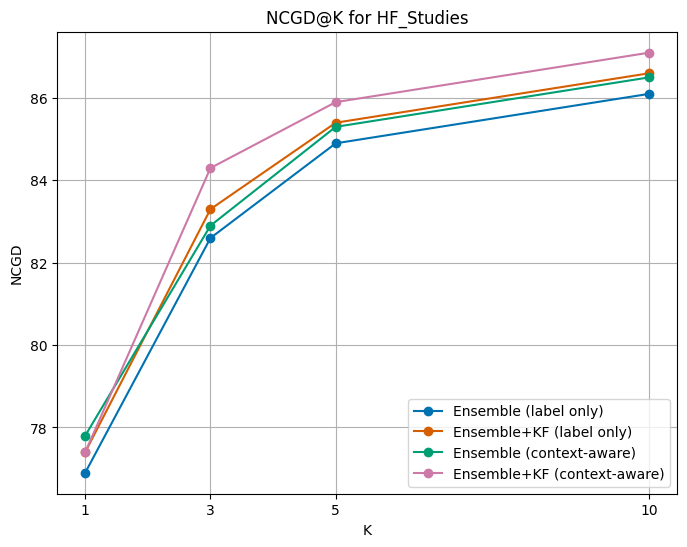

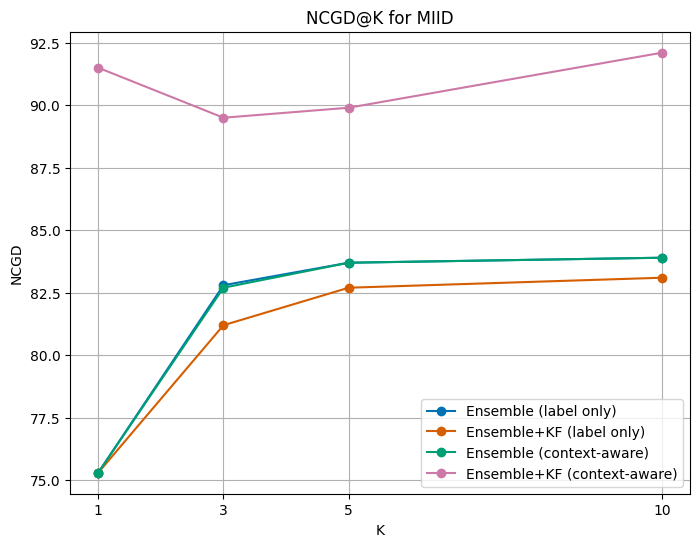

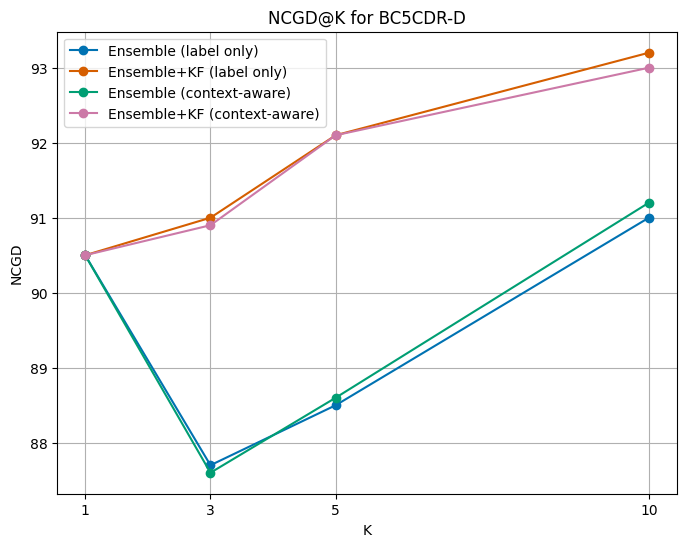

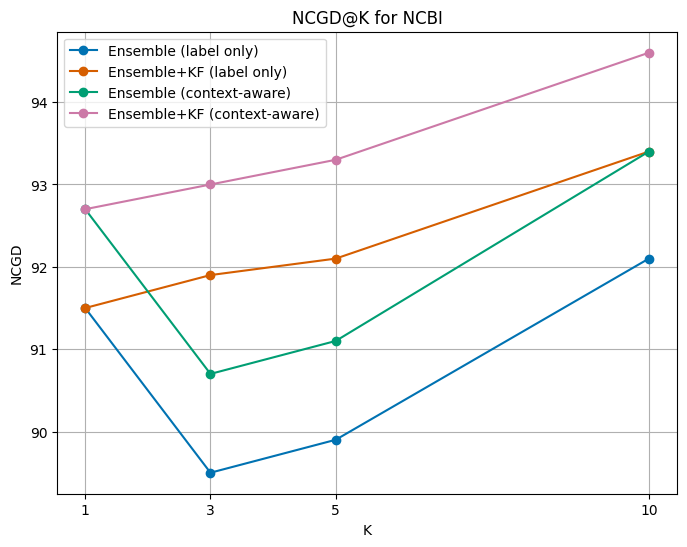

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for HF_Studies (replace with your actual data)
configurations = [
    "Ensemble (label only)",
    "Ensemble+KF (label only)",
    "Ensemble (context-aware)",
    "Ensemble+KF (context-aware)",
]
k_values = [1, 3, 5, 10]

# Accuracy@K and Recall@K (replace with your actual data)

# MRR (replace with your actual data)

# NCGD@K (replace with your actual data)
ncgd_scores_hf_studies = [
    [76.9, 82.6, 84.9, 86.1],
    [77.4, 83.3, 85.4, 86.6],
    [77.8, 82.9, 85.3, 86.5],
    [77.4, 84.3, 85.9, 87.1],
]

ncgd_scores_miid = [
    [75.3, 82.8, 83.7, 83.9],
    [75.3, 81.2, 82.7, 83.1],
    [75.3, 82.7, 83.7, 83.9],
    [91.5, 89.5, 89.9, 92.1],
]
ncgd_scores_bc5cdr_disease = [
    [90.5, 87.7, 88.5, 91],
    [90.5, 91, 92.1, 93.2],
    [90.5, 87.6, 88.6, 91.2],
    [90.5, 90.9, 92.1, 93],
]
ncgd_scores_ncbi = [
    [91.5, 89.5, 89.9, 92.1],
    [91.5, 91.9, 92.1, 93.4],
    [92.7, 90.7, 91.1, 93.4],
    [92.7, 93.0, 93.3, 94.6],
]
# Plotting Accuracy@K and Recall@K

# Updated colors for color-blind accessibility
color_blind_friendly_colors = [
    "#0072B2",
    "#D55E00",
    "#009E73",
    "#CC79A7",
]  # Blue, Orange, Green, Pink


# Function to plot NCGD@K with color-blind friendly colors
def plot_ncgd_scores_colorblind(k_values, ncgd_scores, title):
    plt.figure(figsize=(8, 6))
    for i, scores in enumerate(ncgd_scores):
        plt.plot(
            k_values,
            scores,
            marker="o",
            label=configurations[i],
            color=color_blind_friendly_colors[i],
        )
    plt.title(title)
    plt.xlabel("K")
    plt.ylabel("NCGD")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()


# Plotting for each dataset with color-blind friendly colors
plot_ncgd_scores_colorblind(k_values, ncgd_scores_hf_studies, "NCGD@K for HF_Studies")
plot_ncgd_scores_colorblind(k_values, ncgd_scores_miid, "NCGD@K for MIID")
plot_ncgd_scores_colorblind(k_values, ncgd_scores_bc5cdr_disease, "NCGD@K for BC5CDR-D")
plot_ncgd_scores_colorblind(k_values, ncgd_scores_ncbi, "NCGD@K for NCBI")


In [3]:
# NCGD@K (replace with your actual data)
ncgd_scores_miid = [
    [75.3, 82.8, 83.7, 83.9],
    [75.3, 81.2, 82.7, 83.1],
    [75.3, 82.7, 83.7, 83.9],
    [91.5, 89.5, 89.9, 92.1],
]


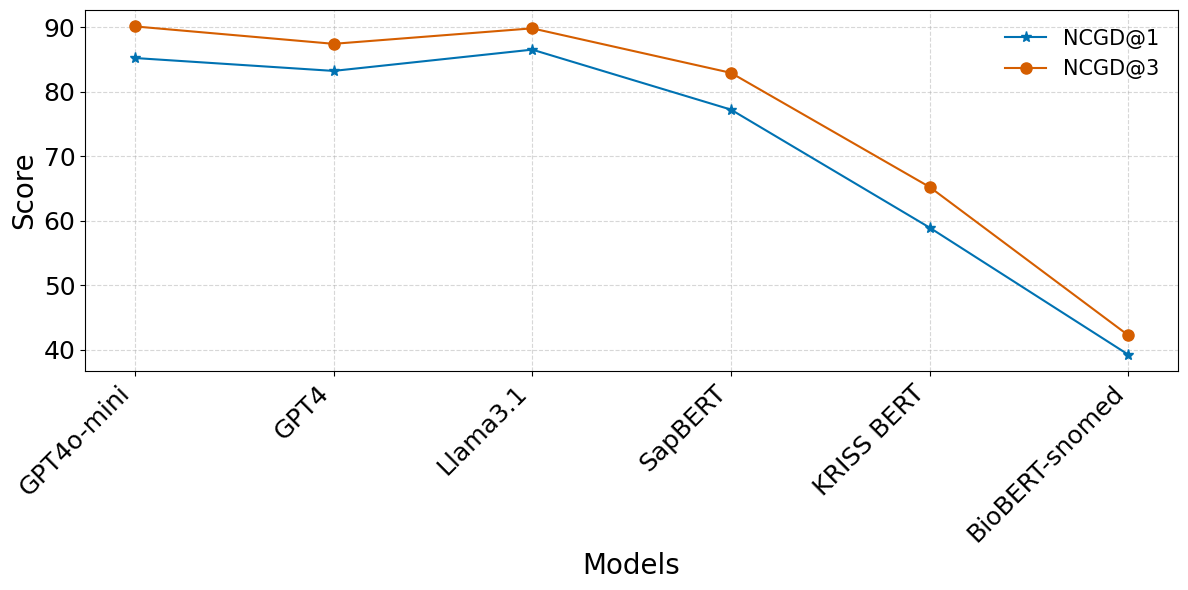

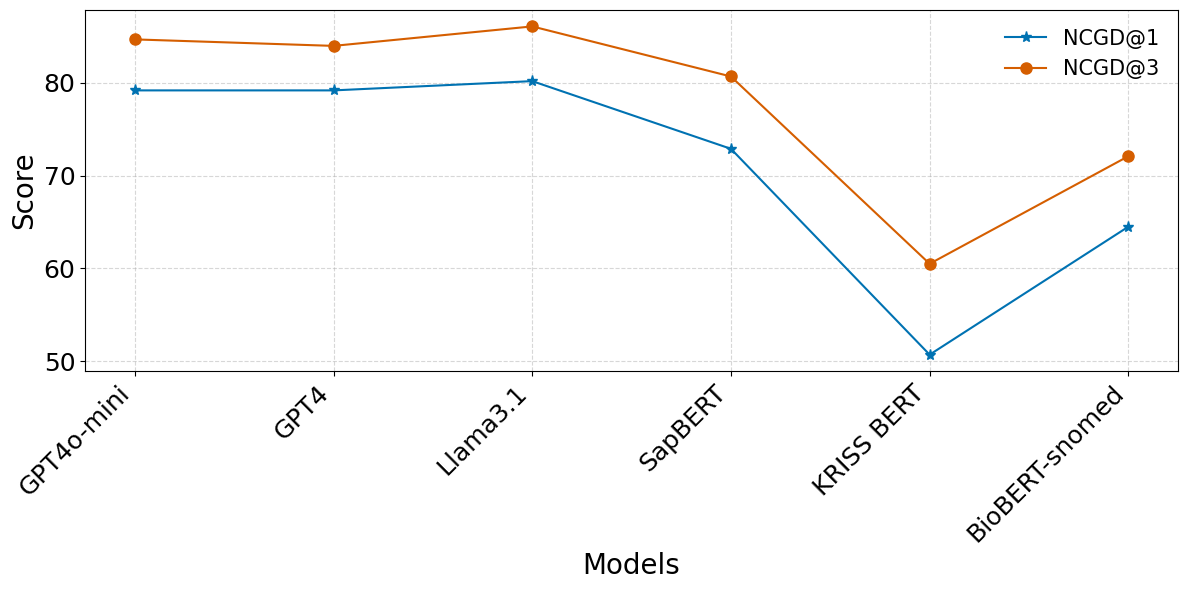

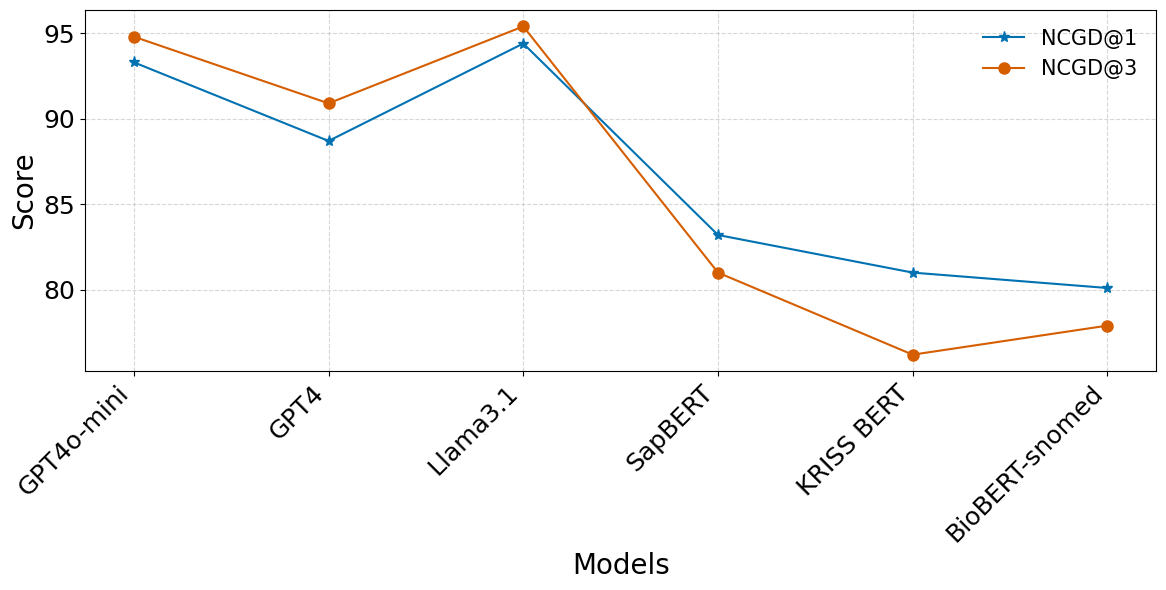

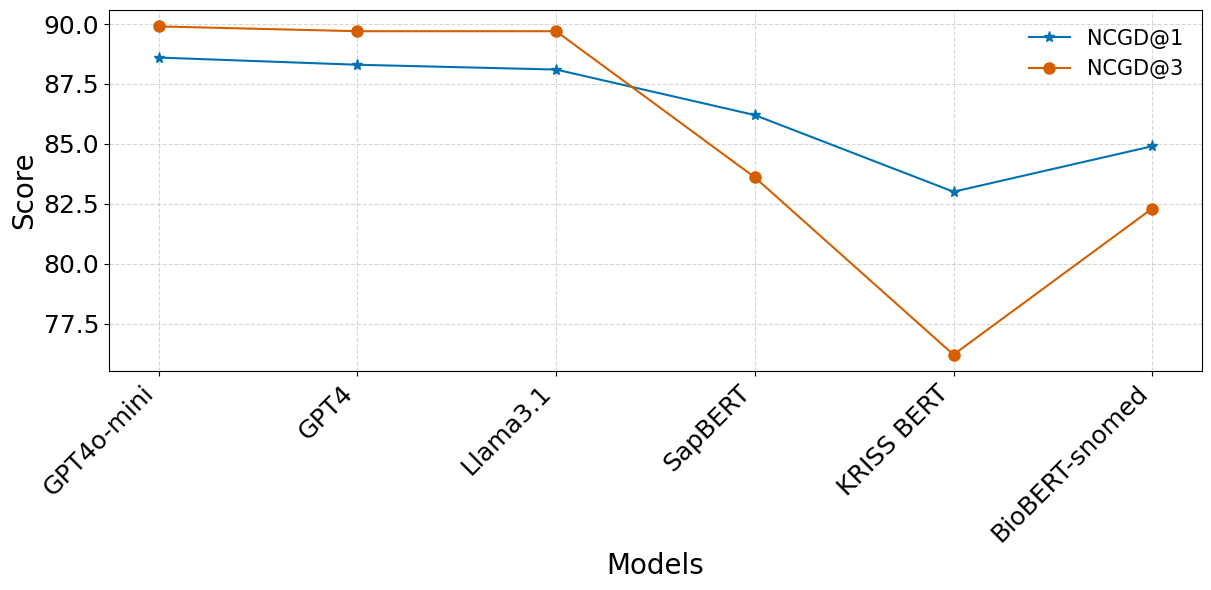

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each dataset
data = {
    "HF_Studies": {
        "GPT4o-mini": [85.2, 90.1],
        "GPT4": [83.2, 87.4],
        "Llama3.1": [86.5, 89.8],
        "SapBERT": [77.2, 82.9],
        "KRISS BERT": [58.9, 65.2],
        "BioBERT-snomed": [39.2, 42.2],
    },
    "MIID": {
        "GPT4o-mini": [79.2, 84.7],
        "GPT4": [79.2, 84],
        "Llama3.1": [80.2, 86.1],
        "SapBERT": [72.9, 80.7],
        "KRISS BERT": [50.7, 60.5],
        "BioBERT-snomed": [64.5, 72.1],
    },
    "NCBI": {
        "GPT4o-mini": [93.3, 94.8],
        "GPT4": [88.7, 90.9],
        "Llama3.1": [94.4, 95.4],
        "SapBERT": [83.2, 81],
        "KRISS BERT": [81, 76.2],
        "BioBERT-snomed": [80.1, 77.9],
    },
    "BC5CDR-D": {
        "GPT4o-mini": [88.6, 89.9],
        "GPT4": [88.3, 89.7],
        "Llama3.1": [88.1, 89.7],
        "SapBERT": [86.2, 83.6],
        "KRISS BERT": [83, 76.2],
        "BioBERT-snomed": [84.9, 82.3],
    },
}

# Convert the data into a DataFrame
df = pd.DataFrame.from_dict(
    {
        (dataset, model): scores
        for dataset, models in data.items()
        for model, scores in models.items()
    },
    orient="index",
    columns=["NCGD@1", "NCGD@3"],
)

df_reset = df.reset_index()
df_reset[["Dataset", "Model"]] = pd.DataFrame(
    df_reset["index"].tolist(), index=df_reset.index
)
df_reset = df_reset.drop(columns=["index"])

# Rename columns to maintain consistency
df_reset.columns = ["NCGD@1", "NCGD@3", "Dataset", "Model"]
df_reset = df_reset[["Dataset", "Model", "NCGD@1", "NCGD@3"]]
colors = {"NCGD@1": "#0072B2", "NCGD@3": "#D55E00"}
# Line chart for each dataset with NCGD@1 and NCGD@3
for dataset in df_reset["Dataset"].unique():
    subset = df_reset[df_reset["Dataset"] == dataset]
    plt.figure(figsize=(12, 6))
    plt.plot(
        subset["Model"],
        subset["NCGD@1"],
        "*-",
        label="NCGD@1",
        markersize=8,
        color=colors["NCGD@1"],
    )
    plt.plot(
        subset["Model"],
        subset["NCGD@3"],
        "o-",
        label="NCGD@3",
        markersize=8,
        color=colors["NCGD@3"],
    )
    # plt.title(f"NCGD Scores for {dataset}", fontsize=14)
    plt.xlabel("Models", fontsize=20)
    plt.ylabel("Score", fontsize=20)
    plt.tick_params(axis="x", labelsize=18)  # Increase font size for x-axis tick labels
    plt.tick_params(axis="y", labelsize=18)  # Increase font size for y-axis tick labels
    plt.xticks(rotation=45, ha="right")
    plt.legend(loc="upper right", fontsize=15, ncol=1, frameon=False)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.savefig(
        f"/workspace/mapping_tool/evaluation/visualize_experiment/output/{dataset}_NCGD_scores.svg",
        format="svg",
    )
    plt.show()


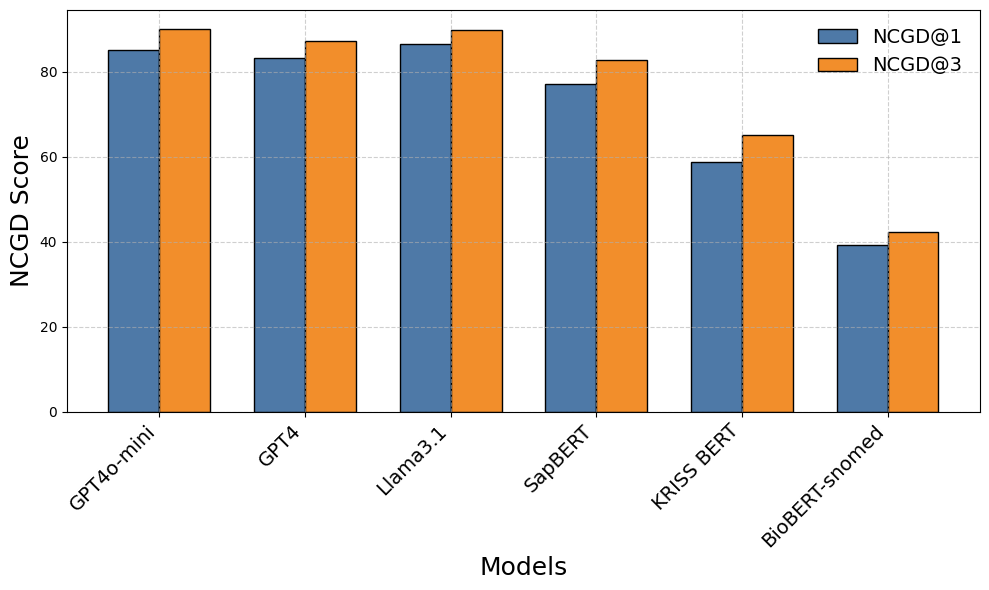

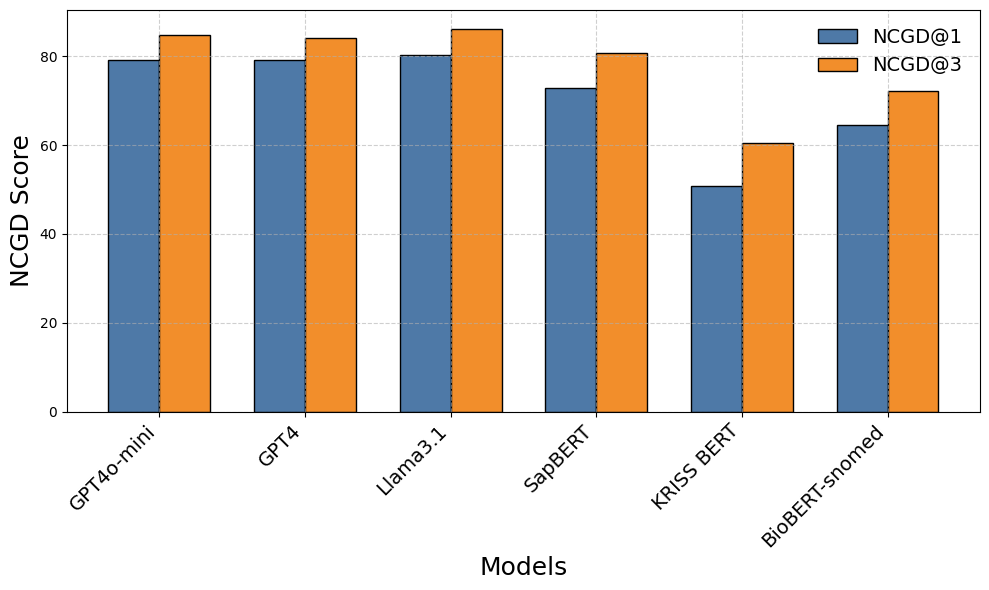

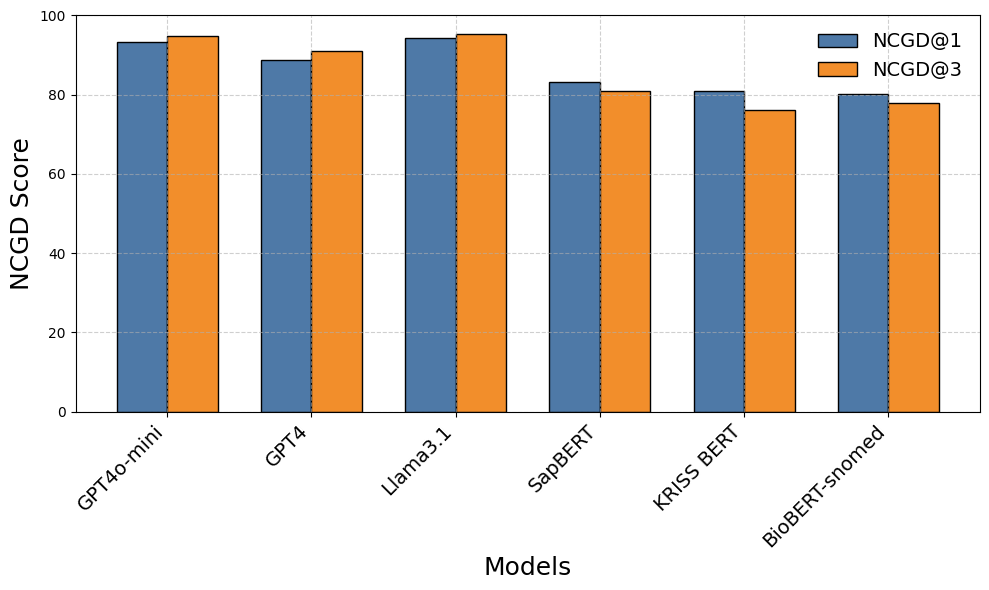

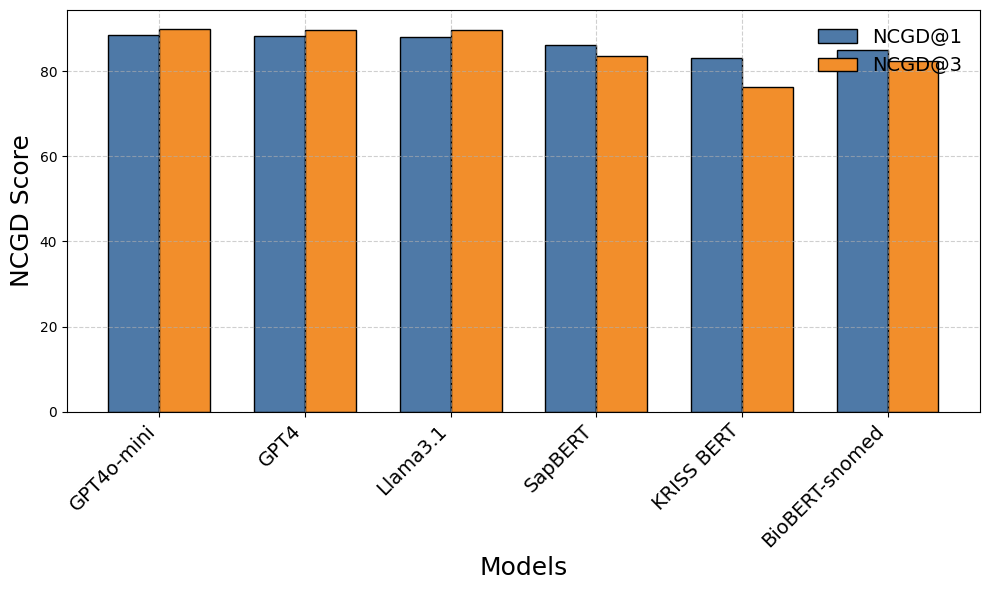

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Professional color scheme for NCGD metrics
colors = {"NCGD@1": "#4E79A7", "NCGD@3": "#F28E2B"}

# Bar chart for each dataset with NCGD@1 and NCGD@3
for dataset in df_reset["Dataset"].unique():
    subset = df_reset[df_reset["Dataset"] == dataset]
    x = subset["Model"]
    width = 0.35  # Width of bars
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Positions for grouped bars
    x_indexes = range(len(x))
    
    # Bar plots
    ax.bar(
        x_indexes,
        subset["NCGD@1"],
        width=width,
        label="NCGD@1",
        color=colors["NCGD@1"],
        align="center",
        edgecolor="black",
    )
    ax.bar(
        [i + width for i in x_indexes],
        subset["NCGD@3"],
        width=width,
        label="NCGD@3",
        color=colors["NCGD@3"],
        align="center",
        edgecolor="black",
    )
    
    # Add labels and title
    ax.set_xlabel("Models", fontsize=18)
    ax.set_ylabel("NCGD Score", fontsize=18)
    ax.set_xticks([i + width / 2 for i in x_indexes])
    ax.set_xticklabels(x, rotation=45, ha="right", fontsize=14)
    ax.legend(loc="upper right", fontsize=14, frameon=False)
    ax.grid(True, linestyle="--", alpha=0.6)
    
    # Ensure a clean layout for journal presentation
    plt.tight_layout()
    
    # Save the figure in a vector format suitable for journals
    plt.savefig(
        f"/workspace/mapping_tool/evaluation/visualize_experiment/output/{dataset}_NCGD_scores_bar.svg",
        format="svg",
        dpi=300,
    )
    plt.show()
